# 데이터 분석 간 관계

### Scatter Plot의 이해
- 두 연속형 변수의 관계를 시각화 하는 가장 기본적인 그래프
- 두 연속형 변수간의 영향력(분포와 상관 경향)을 점(point)로 표시
- 패턴(직선적, 곡선적), 군집 형태, 이상치를 쉽게 파악
- 통계적 모델은 포함하지 않으며 관계의 형태를 '그려만 준다'
- 

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
import numpy as np                        # 가장 중요한 역할
from hossam import load_data

In [3]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [5]:
origin = load_data('icecream')
origin.head()

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476


### Scatter Plot의 해석
- 마커들이 밀집하여 있으면 관련성이 높고, 흩어져 있으면 관련성이 낮다.
- 이러한 관계를 상관관계라 일컫음

### Scatter Plot 시각화

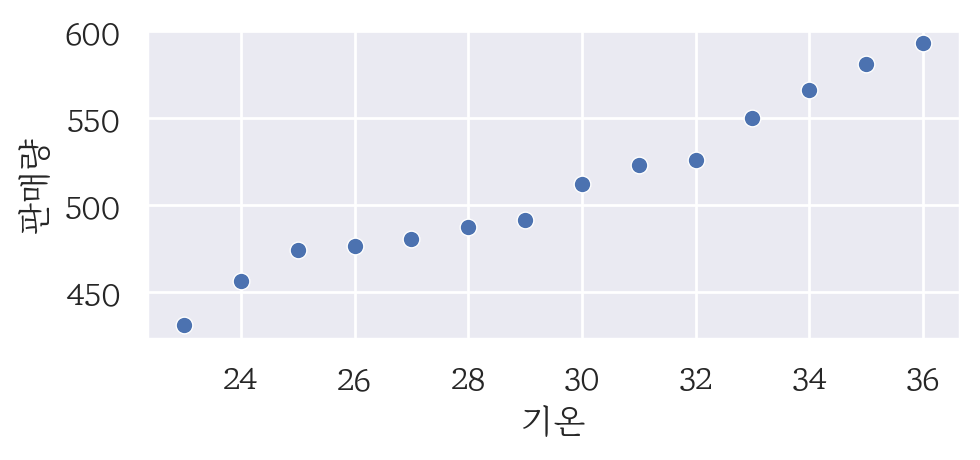

In [12]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data=origin, x='기온', y ='판매량')

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### 추세선(회귀선) 그리기

In [13]:
# 기울기와 절편 구하기
# 계수, 상수항 = np.polifit(x, y, 차수)

z = np.polyfit(origin['기온'], origin['판매량'], 1)
print('상수항', z[0])
print('계수', z[1])


상수항 11.397802197802186
계수 174.19340659340722


### 회귀 분석 모형

In [14]:
# 상수항, 계수 활용하여 방정식 확인

expr = 'y =%01.f * x + %0.1f' % (z[0], z[1])
expr

'y =11 * x + 174.2'

### 분석 모형 객체 생성

In [18]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

### 분석모형을 활용한 판매량 예

In [16]:
x = 40

print('기온이 %d일 경우 아이스크림 판매량은 %f로 예상' % (x, f(x)))

기온이 40일 경우 아이스크림 판매량은 630.105495로 예상


### 전체 기온에 대한 예측 판매량 확인


In [19]:
x = origin['기온']
y = f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

### 추세선을 포함하는 산점도 그래프

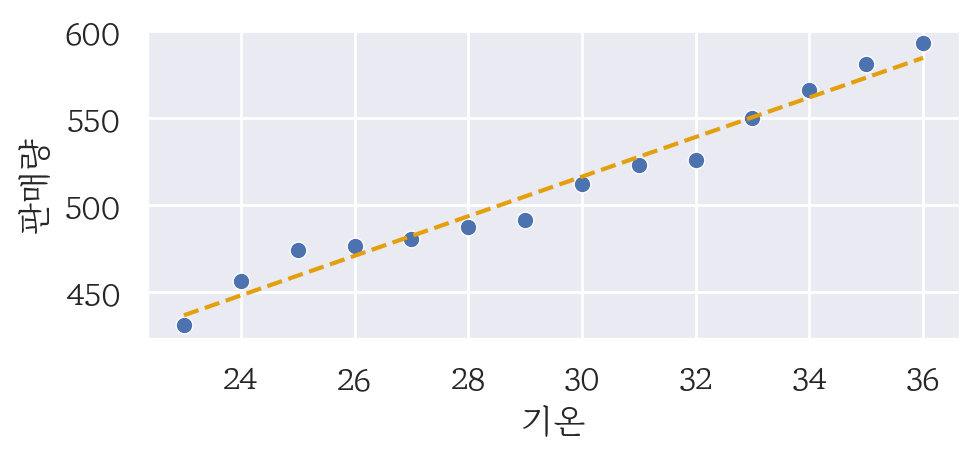

In [23]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.scatterplot(data =origin, x = '기온', y ='판매량')
sb.lineplot(x =x, y=y, color = '#e4a00c', linestyle = '--')
# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()